In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/raw/tier_1_data.csv', index_col=False)

In [3]:
df.head()

,Unnamed: 0,url,match-id,date,event,team1,team1score,team1-id,team2,team2-id,...,player7_rating,player7_kd,player8_id,player8_rating,player8_kd,player9_id,player9_rating,player9_kd,team1_Ranking,team2_Ranking
0,0,https://hltv.org/matches/2370784/imperial-vs-p...,2370784,2024-04-20,NaN,Imperial,1,9455,paiN,4773,...,1.10,1.01,20085,1.02,0.99,22126.0,0.97,0.91,18.0,16.0
1,1,https://hltv.org/matches/2370783/pain-vs-mibr-...,2370783,2024-04-19,NaN,paiN,2,4773,MIBR,9215,...,1.14,1.16,19750,1.13,1.10,20987.0,1.13,1.07,16.0,30.0
2,2,https://hltv.org/matches/2370782/mibr-vs-og-gl...,2370782,2024-04-19,NaN,MIBR,2,9215,OG,10503,...,1.00,0.91,12781,0.90,0.74,NaN,NaN,NaN,30.0,34.0
3,3,https://hltv.org/matches/2370781/imperial-vs-p...,2370781,2024-04-19,NaN,Imperial,2,9455,paiN,4773,...,1.10,1.01,20085,1.02,0.99,22126.0,0.97,0.91,18.0,16.0
4,4,https://hltv.org/matches/2370780/9z-vs-og-glob...,2370780,2024-04-19,NaN,9z,0,9996,OG,10503,...,1.00,0.91,12781,0.90,0.74,NaN,NaN,NaN,43.0,34.0


In [4]:
df = df.drop(columns=["url", "Unnamed: 0", "event", "match-id", "date", "team1-id", "team2-id"])

In [5]:
df['team1'].unique()

array(['Imperial', 'paiN', 'MIBR', '9z', 'Monte', 'Metizport', 'FURIA',
       'MOUZ', 'Astralis', 'Liquid', 'Virtus.pro', 'G2', 'FaZe',
       'FlyQuest', 'Cloud9', 'HEROIC', 'Steel Helmet', 'Lynn Vision',
       'Wildcard', 'TYLOO', 'Spirit', 'ENCE', 'Falcons', 'Natus Vincere',
       'Complexity', 'GamerLegion', 'Eternal Fire', 'Vitality', 'BIG',
       'OG', 'Ninjas in Pyjamas', 'Apeks', 'TheMongolz', 'BESTIA', 'M80',
       'Nigma Galaxy', 'Fluxo Demons', '9 Pandas Fearless',
       'NAVI Javelins', 'HSG fe', 'FURIA fe', 'FlyQuest RED', 'BetBoom',
       'HAVU', 'Nouns', '3DMAX', '9 Pandas', 'PARIVISION',
       'Movistar Riders', 'Wings Up'], dtype=object)

In [6]:
def convert_match_stage(ms_str):
    if 'group' in ms_str.lower():
        return 'G'
    elif 'quarter' in ms_str.lower():
        return 'QF'
    elif 'semi' in ms_str.lower():
        return 'SF'
    elif 'grand' in ms_str.lower():
        return 'GF'
    else:
        return 'NA'

def convert_match_type(mt_str):
    if '1' in mt_str.lower():
        return 'BO1'
    elif '3' in mt_str.lower():
        return 'BO3'
    elif '5' in mt_str.lower():
        return 'BO5'
    else:
        return 'NA'

In [7]:
df['match_stage'] = df['match_stage'].apply(convert_match_stage)
df['match_type'] = df['match_type'].apply(convert_match_type)


In [8]:
df['team_1_won'] = np.int32(df['team1score']>df['team2score']) ## maybe consider doing ratio showing how much they won by 

In [9]:
df.head()

,team1,team1score,team2,team2score,match_type,match_stage,player0_id,player0_rating,player0_kd,player1_id,...,player7_kd,player8_id,player8_rating,player8_kd,player9_id,player9_rating,player9_kd,team1_Ranking,team2_Ranking,team_1_won
0,Imperial,1,paiN,2,BO3,GF,9219,1.18,1.13,8565,...,1.01,20085,1.02,0.99,22126.0,0.97,0.91,18.0,16.0,0
1,paiN,2,MIBR,0,BO3,NA,18141,1.13,1.01,19694,...,1.16,19750,1.13,1.10,20987.0,1.13,1.07,16.0,30.0,1
2,MIBR,2,OG,1,BO3,NA,21037,1.22,1.19,11154,...,0.91,12781,0.90,0.74,NaN,NaN,NaN,30.0,34.0,1
3,Imperial,2,paiN,1,BO3,NA,9219,1.18,1.13,8565,...,1.01,20085,1.02,0.99,22126.0,0.97,0.91,18.0,16.0,1
4,9z,0,OG,2,BO3,SF,14736,1.17,1.17,21239,...,0.91,12781,0.90,0.74,NaN,NaN,NaN,43.0,34.0,0


In [9]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['team1', 'team2']
# categorical_features = ['team1', 'team2', 'player0_id', 'player1_id', 'player2_id', 'player3_id', 'player4_id', 'player5_id', 'player6_id', 'player7_id', 'player8_id', 'player9_id']
# categorical_features = ['team1', 'team2', 'match_type', 'match_stage', 'player0_id', 'player1_id', 'player2_id', 'player3_id', 'player4_id', 'player5_id', 'player6_id', 'player7_id', 'player8_id', 'player9_id']

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])

numerical_features = ['team1_Ranking', 'team2_Ranking']
for i in range(10):
    numerical_features.append(f'player{i}_rating')
    numerical_features.append(f'player{i}_kd')



In [10]:
X = pd.concat([pd.DataFrame(encoded_features), df[numerical_features]], axis=1, ignore_index=True)
X.columns = X.columns.astype(str)

X = df[numerical_features]
X = X.dropna()
y = df.dropna()['team_1_won']


In [11]:
X_test = X[156:]
y_test = y[156:]
X_train = X[:156]
y_train = y[:156]

In [12]:
X_train

,team1_Ranking,team2_Ranking,player0_rating,player0_kd,player1_rating,player1_kd,player2_rating,player2_kd,player3_rating,player3_kd,...,player5_rating,player5_kd,player6_rating,player6_kd,player7_rating,player7_kd,player8_rating,player8_kd,player9_rating,player9_kd
0,18.0,16.0,1.18,1.13,1.12,1.19,1.12,1.06,1.09,1.12,...,1.13,1.01,1.10,1.22,1.10,1.01,1.02,0.99,0.97,0.91
1,16.0,30.0,1.13,1.01,1.10,1.22,1.10,1.01,1.02,0.99,...,1.22,1.19,1.16,1.16,1.14,1.16,1.13,1.10,1.13,1.07
3,18.0,16.0,1.18,1.13,1.12,1.19,1.12,1.06,1.09,1.12,...,1.13,1.01,1.10,1.22,1.10,1.01,1.02,0.99,0.97,0.91
8,16.0,30.0,1.13,1.01,1.11,1.23,1.11,1.01,1.03,1.00,...,1.21,1.19,1.16,1.17,1.14,1.10,1.14,1.17,1.11,1.08
9,18.0,43.0,1.19,1.14,1.12,1.20,1.11,1.04,1.10,1.14,...,1.18,1.24,1.17,1.17,1.05,1.04,1.05,0.97,0.93,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,10.0,21.0,1.20,1.45,1.14,1.05,1.07,1.07,1.05,1.01,...,1.15,1.11,1.09,1.12,1.09,1.02,1.08,1.09,0.98,0.90
171,7.0,42.0,1.16,1.20,1.10,1.04,1.09,1.04,1.07,1.00,...,1.14,1.11,1.07,1.02,1.07,1.04,1.05,0.95,1.04,1.03
172,21.0,12.0,1.15,1.11,1.09,1.12,1.09,1.02,1.08,1.09,...,1.04,0.96,1.02,0.93,0.99,1.00,0.93,0.82,0.92,0.83
173,10.0,30.0,1.20,1.45,1.14,1.05,1.07,1.07,1.05,1.01,...,1.20,1.03,1.11,1.15,1.02,1.02,0.99,1.02,0.86,0.64


In [13]:
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
log_reg_model = LogisticRegression(C = 1)
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred = log_reg_model.predict(X_test)

from sklearn.metrics import f1_score

acc = np.mean(y_pred == y_test)
f1s = f1_score(y_test, y_pred)

print('acc: ', acc, 'f1 score: ', f1s)

acc:  0.6470588235294118 f1 score:  0.75


c:\Users\Joe\Desktop\Term-2\Data_Science\DS_CW_2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


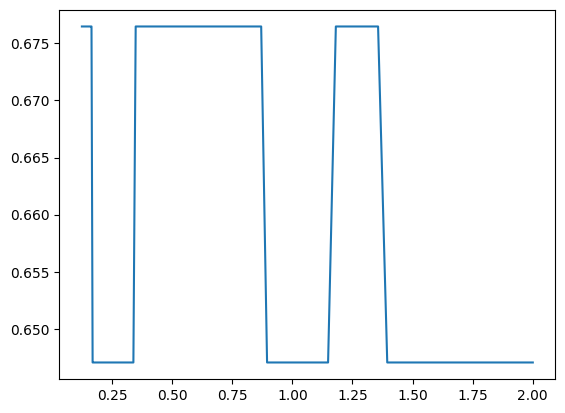

In [21]:
accs = []

Cs = 2**np.linspace(-3, 1, 101)

for C in Cs:
    # Initialize and train logistic regression model
    log_reg_model = LogisticRegression(C = C, penalty='l2', solver='liblinear')
    log_reg_model.fit(X_train, y_train)

    # Predictions
    y_pred = log_reg_model.predict(X_test)

    from sklearn.metrics import f1_score

    acc = np.mean(y_pred == y_test)
    accs.append(acc)

import matplotlib.pyplot as plt

plt.plot(Cs, accs)

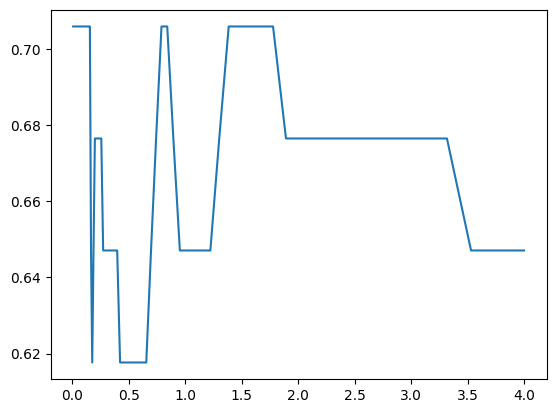

In [23]:
accs = []

Cs = 2**np.linspace(-7, 2, 101)

for C in Cs:
    # Initialize and train logistic regression model
    log_reg_model = LogisticRegression(C = C, penalty='l1', solver='liblinear', max_iter=1000)
    log_reg_model.fit(X_train, y_train)

    # Predictions
    y_pred = log_reg_model.predict(X_test)

    from sklearn.metrics import f1_score

    acc = np.mean(y_pred == y_test)
    accs.append(acc)

import matplotlib.pyplot as plt

plt.plot(Cs, accs)



In [24]:
log_reg_best = LogisticRegression(C = 1.6, penalty='l1', solver='liblinear', max_iter=1000)
log_reg_best.fit(X_train, y_train)

# Predictions
y_pred = log_reg_best.predict(X_test)

acc = np.mean(y_pred == y_test)
f1s = f1_score(y_test, y_pred)

print('acc: ', acc, 'f1 score: ', f1s)

acc:  0.7058823529411765 f1 score:  0.7727272727272727


In [25]:
print(log_reg_best.predict_proba(X_test)[24:-1])

[[0.41962696 0.58037304]
 [0.57711371 0.42288629]
 [0.56762239 0.43237761]
 [0.71823495 0.28176505]
 [0.41721418 0.58278582]
 [0.08752328 0.91247672]
 [0.46418765 0.53581235]
 [0.52450312 0.47549688]
 [0.32378919 0.67621081]]


In [26]:
df.dropna()[180:-1]

,team1,team1score,team2,team2score,match_type,match_stage,player0_id,player0_rating,player0_kd,player1_id,...,player7_kd,player8_id,player8_rating,player8_kd,player9_id,player9_rating,player9_kd,team1_Ranking,team2_Ranking,team_1_won
202,MOUZ,0,FaZe,2,BO3,GF,9960,1.20,1.26,18850,...,1.08,8183,1.07,0.98,429.0,0.91,0.80,2.0,1.0,0
203,FaZe,2,ENCE,1,BO3,SF,11816,1.22,1.30,18053,...,1.00,11777,1.03,0.98,922.0,0.90,0.81,1.0,4.0,1
204,Astralis,1,MOUZ,2,BO3,SF,15165,1.30,1.43,7592,...,1.28,20312,1.11,1.02,16820.0,0.99,0.89,12.0,2.0,0
206,Lynn Vision,0,MOUZ,2,BO3,QF,18744,1.09,1.05,20254,...,1.22,20312,1.12,1.02,16820.0,1.00,0.91,29.0,2.0,0
208,MOUZ,1,FaZe,2,BO3,G,9960,1.21,1.26,18072,...,1.10,8183,1.07,0.97,429.0,0.90,0.79,2.0,1.0,0
210,MOUZ,13,Wings Up,2,BO1,G,9960,1.21,1.26,18072,...,0.91,16872,1.01,0.97,16768.0,1.00,0.93,2.0,118.0,1
211,TYLOO,1,Lynn Vision,2,BO3,G,19645,1.21,1.32,21621,...,1.13,16551,1.03,0.95,22922.0,1.03,0.97,22.0,29.0,0
212,ENCE,1,Astralis,2,BO3,G,19164,1.21,1.32,9436,...,1.00,20304,0.99,0.94,9896.0,0.91,0.82,4.0,12.0,0
213,Astralis,13,Lynn Vision,4,BO1,G,15165,1.32,1.47,7592,...,1.13,16551,1.03,0.95,22922.0,1.03,0.97,12.0,29.0,1


In [27]:
mask = abs(log_reg_best.coef_)>1e-3

print(mask)
# Filter out columns based on the mask
filtered_df = X.loc[:, mask.squeeze()]


[[ True  True False False False  True False False False False  True  True
  False  True False  True False False False False False False]]


In [28]:
X_test_filtered = filtered_df[156:]
y_test_filtered = y[156:]
X_train_filtered = filtered_df[:156]
y_train_filtered = y[:156]

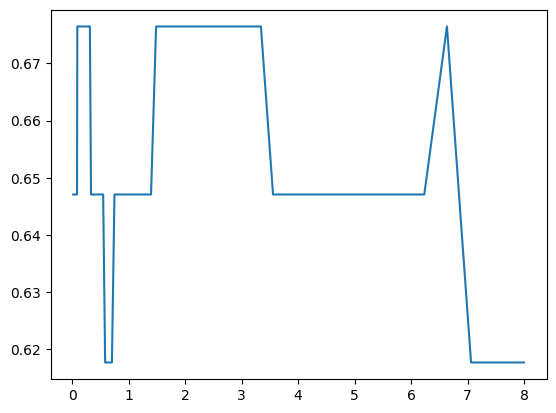

In [31]:
accs = []

Cs = 2**np.linspace(-6, 3, 101)

for C in Cs:
    # Initialize and train logistic regression model
    log_reg_model = LogisticRegression(C = C, penalty='l2', solver='liblinear')
    log_reg_model.fit(X_train_filtered, y_train_filtered)

    # Predictions
    y_pred = log_reg_model.predict(X_test_filtered)

    from sklearn.metrics import f1_score

    acc = np.mean(y_pred == y_test_filtered)
    accs.append(acc)

import matplotlib.pyplot as plt

plt.plot(Cs, accs)

best_C = Cs[np.argmax(accs)]

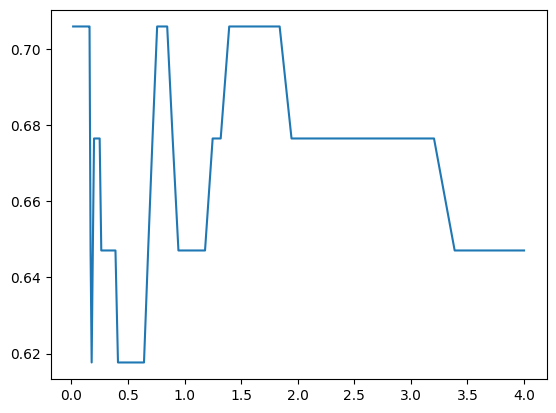

In [34]:
accs = []

Cs = 2**np.linspace(-6, 2, 101)

for C in Cs:
    # Initialize and train logistic regression model
    log_reg_model = LogisticRegression(C = C, penalty='l1', solver='liblinear', max_iter=1000)
    log_reg_model.fit(X_train_filtered, y_train_filtered)

    # Predictions
    y_pred = log_reg_model.predict(X_test_filtered)

    from sklearn.metrics import f1_score

    acc = np.mean(y_pred == y_test_filtered)
    accs.append(acc)

import matplotlib.pyplot as plt

plt.plot(Cs, accs)

In [35]:
log_reg_best = LogisticRegression(C = 1.6, penalty='l1', solver='liblinear', max_iter=1000)
log_reg_best.fit(X_train_filtered, y_train_filtered)

# Predictions
y_pred = log_reg_best.predict(X_test_filtered)

acc = np.mean(y_pred == y_test_filtered)
f1s = f1_score(y_test_filtered, y_pred)

print('acc: ', acc, 'f1 score: ', f1s)

acc:  0.7058823529411765 f1 score:  0.7727272727272727


In [36]:
print(log_reg_best.predict_proba(X_test_filtered)[24:-1])

[[0.41947797 0.58052203]
 [0.57703492 0.42296508]
 [0.56653449 0.43346551]
 [0.71820619 0.28179381]
 [0.41642644 0.58357356]
 [0.08740061 0.91259939]
 [0.46523343 0.53476657]
 [0.52277959 0.47722041]
 [0.32378495 0.67621505]]


In [37]:
df.dropna()[180:-1]

,team1,team1score,team2,team2score,match_type,match_stage,player0_id,player0_rating,player0_kd,player1_id,...,player7_kd,player8_id,player8_rating,player8_kd,player9_id,player9_rating,player9_kd,team1_Ranking,team2_Ranking,team_1_won
202,MOUZ,0,FaZe,2,BO3,GF,9960,1.20,1.26,18850,...,1.08,8183,1.07,0.98,429.0,0.91,0.80,2.0,1.0,0
203,FaZe,2,ENCE,1,BO3,SF,11816,1.22,1.30,18053,...,1.00,11777,1.03,0.98,922.0,0.90,0.81,1.0,4.0,1
204,Astralis,1,MOUZ,2,BO3,SF,15165,1.30,1.43,7592,...,1.28,20312,1.11,1.02,16820.0,0.99,0.89,12.0,2.0,0
206,Lynn Vision,0,MOUZ,2,BO3,QF,18744,1.09,1.05,20254,...,1.22,20312,1.12,1.02,16820.0,1.00,0.91,29.0,2.0,0
208,MOUZ,1,FaZe,2,BO3,G,9960,1.21,1.26,18072,...,1.10,8183,1.07,0.97,429.0,0.90,0.79,2.0,1.0,0
210,MOUZ,13,Wings Up,2,BO1,G,9960,1.21,1.26,18072,...,0.91,16872,1.01,0.97,16768.0,1.00,0.93,2.0,118.0,1
211,TYLOO,1,Lynn Vision,2,BO3,G,19645,1.21,1.32,21621,...,1.13,16551,1.03,0.95,22922.0,1.03,0.97,22.0,29.0,0
212,ENCE,1,Astralis,2,BO3,G,19164,1.21,1.32,9436,...,1.00,20304,0.99,0.94,9896.0,0.91,0.82,4.0,12.0,0
213,Astralis,13,Lynn Vision,4,BO1,G,15165,1.32,1.47,7592,...,1.13,16551,1.03,0.95,22922.0,1.03,0.97,12.0,29.0,1
